In [1]:
# Import packages
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, make_scorer, ConfusionMatrixDisplay, confusion_matrix

In [2]:
# import data

In [3]:
df_ind = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", parse_dates=["date_recorded"])

In [4]:
df_dep = pd.read_csv("Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv")

In [5]:
# Shows all columns in dataframe

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
#look at each dataframe

In [7]:
df_ind.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [9]:
df_dep.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [11]:
df_dep['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [12]:
#merge the two train dataframes- independents variable with dependent variable

In [13]:
df = pd.merge(df_ind,df_dep,on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.00,2013-05-03,Germany Republi,1210,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.00,2011-05-07,Cefa-njombe,1212,Cefa,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.00,2011-04-11,NaN,0,NaN,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.00,2011-03-08,Malec,0,Musa,35.86,-6.38,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [15]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [16]:
df_new = df[["source_type", "water_quality", "waterpoint_type", "status_group", "construction_year"]].copy()

In [17]:
df_new.isna().sum()

source_type          0
water_quality        0
waterpoint_type      0
status_group         0
construction_year    0
dtype: int64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source_type        59400 non-null  object
 1   water_quality      59400 non-null  object
 2   waterpoint_type    59400 non-null  object
 3   status_group       59400 non-null  object
 4   construction_year  59400 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [19]:
df_new['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [20]:
#bin target "status group" using If statments before train/test split "status_group_new"sg_new = []
sg_new = []
for sg in df_new['status_group']:
    if sg == 'functional':
        sg_new.append(1)
    else:
        sg_new.append(0)
df_new["sg_new"] = sg_new

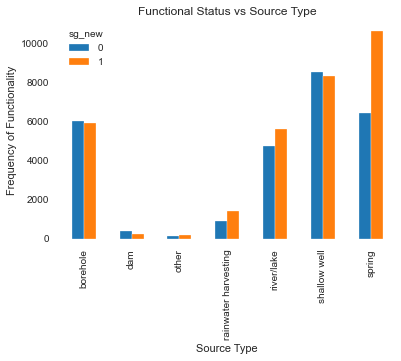

In [21]:
#Status vs source type
%matplotlib inline
pd.crosstab(df_new.source_type,df_new.sg_new).plot(kind='bar')
plt.title('Functional Status vs Source Type')
plt.xlabel('Source Type')
plt.ylabel('Frequency of Functionality')
plt.savefig('source_type',bbox_inches='tight');

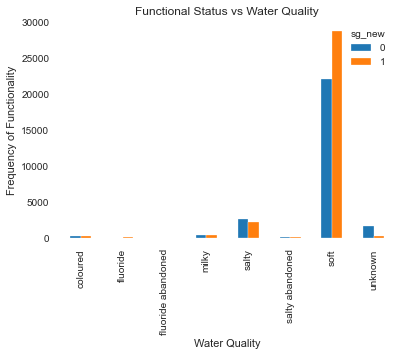

In [22]:
#Status vs water quality
%matplotlib inline
pd.crosstab(df_new.water_quality,df_new.sg_new).plot(kind='bar')
plt.title('Functional Status vs Water Quality')
plt.xlabel('Water Quality')
plt.ylabel('Frequency of Functionality')
plt.savefig('water_quality', bbox_inches='tight');

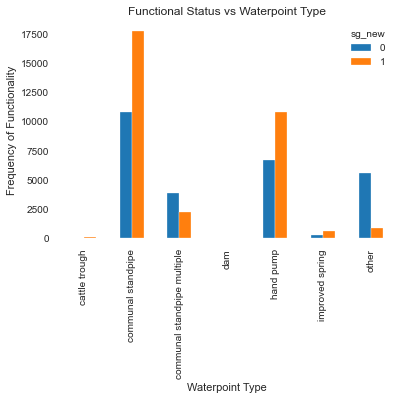

In [23]:
#Status vs waterpoint_type
%matplotlib inline
pd.crosstab(df_new.waterpoint_type,df_new.sg_new).plot(kind='bar')
plt.title('Functional Status vs Waterpoint Type')
plt.xlabel('Waterpoint Type')
plt.ylabel('Frequency of Functionality')
plt.savefig('waterpoint_type',bbox_inches='tight');

In [24]:
df_new.drop(df_new[df_new['construction_year'] == 0].index, inplace = True)

In [25]:
df_new

,source_type,water_quality,waterpoint_type,status_group,construction_year,sg_new
0,spring,soft,communal standpipe,functional,1999,1
1,rainwater harvesting,soft,communal standpipe,functional,2010,1
2,dam,soft,communal standpipe multiple,functional,2009,1
3,borehole,soft,communal standpipe multiple,non functional,1986,0
5,other,salty,communal standpipe multiple,functional,2009,1
...,...,...,...,...,...,...
59391,river/lake,soft,communal standpipe,non functional,1967,0
59394,borehole,soft,communal standpipe,non functional,2007,0
59395,spring,soft,communal standpipe,functional,1999,1
59396,river/lake,soft,communal standpipe,functional,1996,1


In [26]:
df_new.drop(['status_group'], axis =1, inplace = True)

In [27]:
df_new

,source_type,water_quality,waterpoint_type,construction_year,sg_new
0,spring,soft,communal standpipe,1999,1
1,rainwater harvesting,soft,communal standpipe,2010,1
2,dam,soft,communal standpipe multiple,2009,1
3,borehole,soft,communal standpipe multiple,1986,0
5,other,salty,communal standpipe multiple,2009,1
...,...,...,...,...,...
59391,river/lake,soft,communal standpipe,1967,0
59394,borehole,soft,communal standpipe,2007,0
59395,spring,soft,communal standpipe,1999,1
59396,river/lake,soft,communal standpipe,1996,1


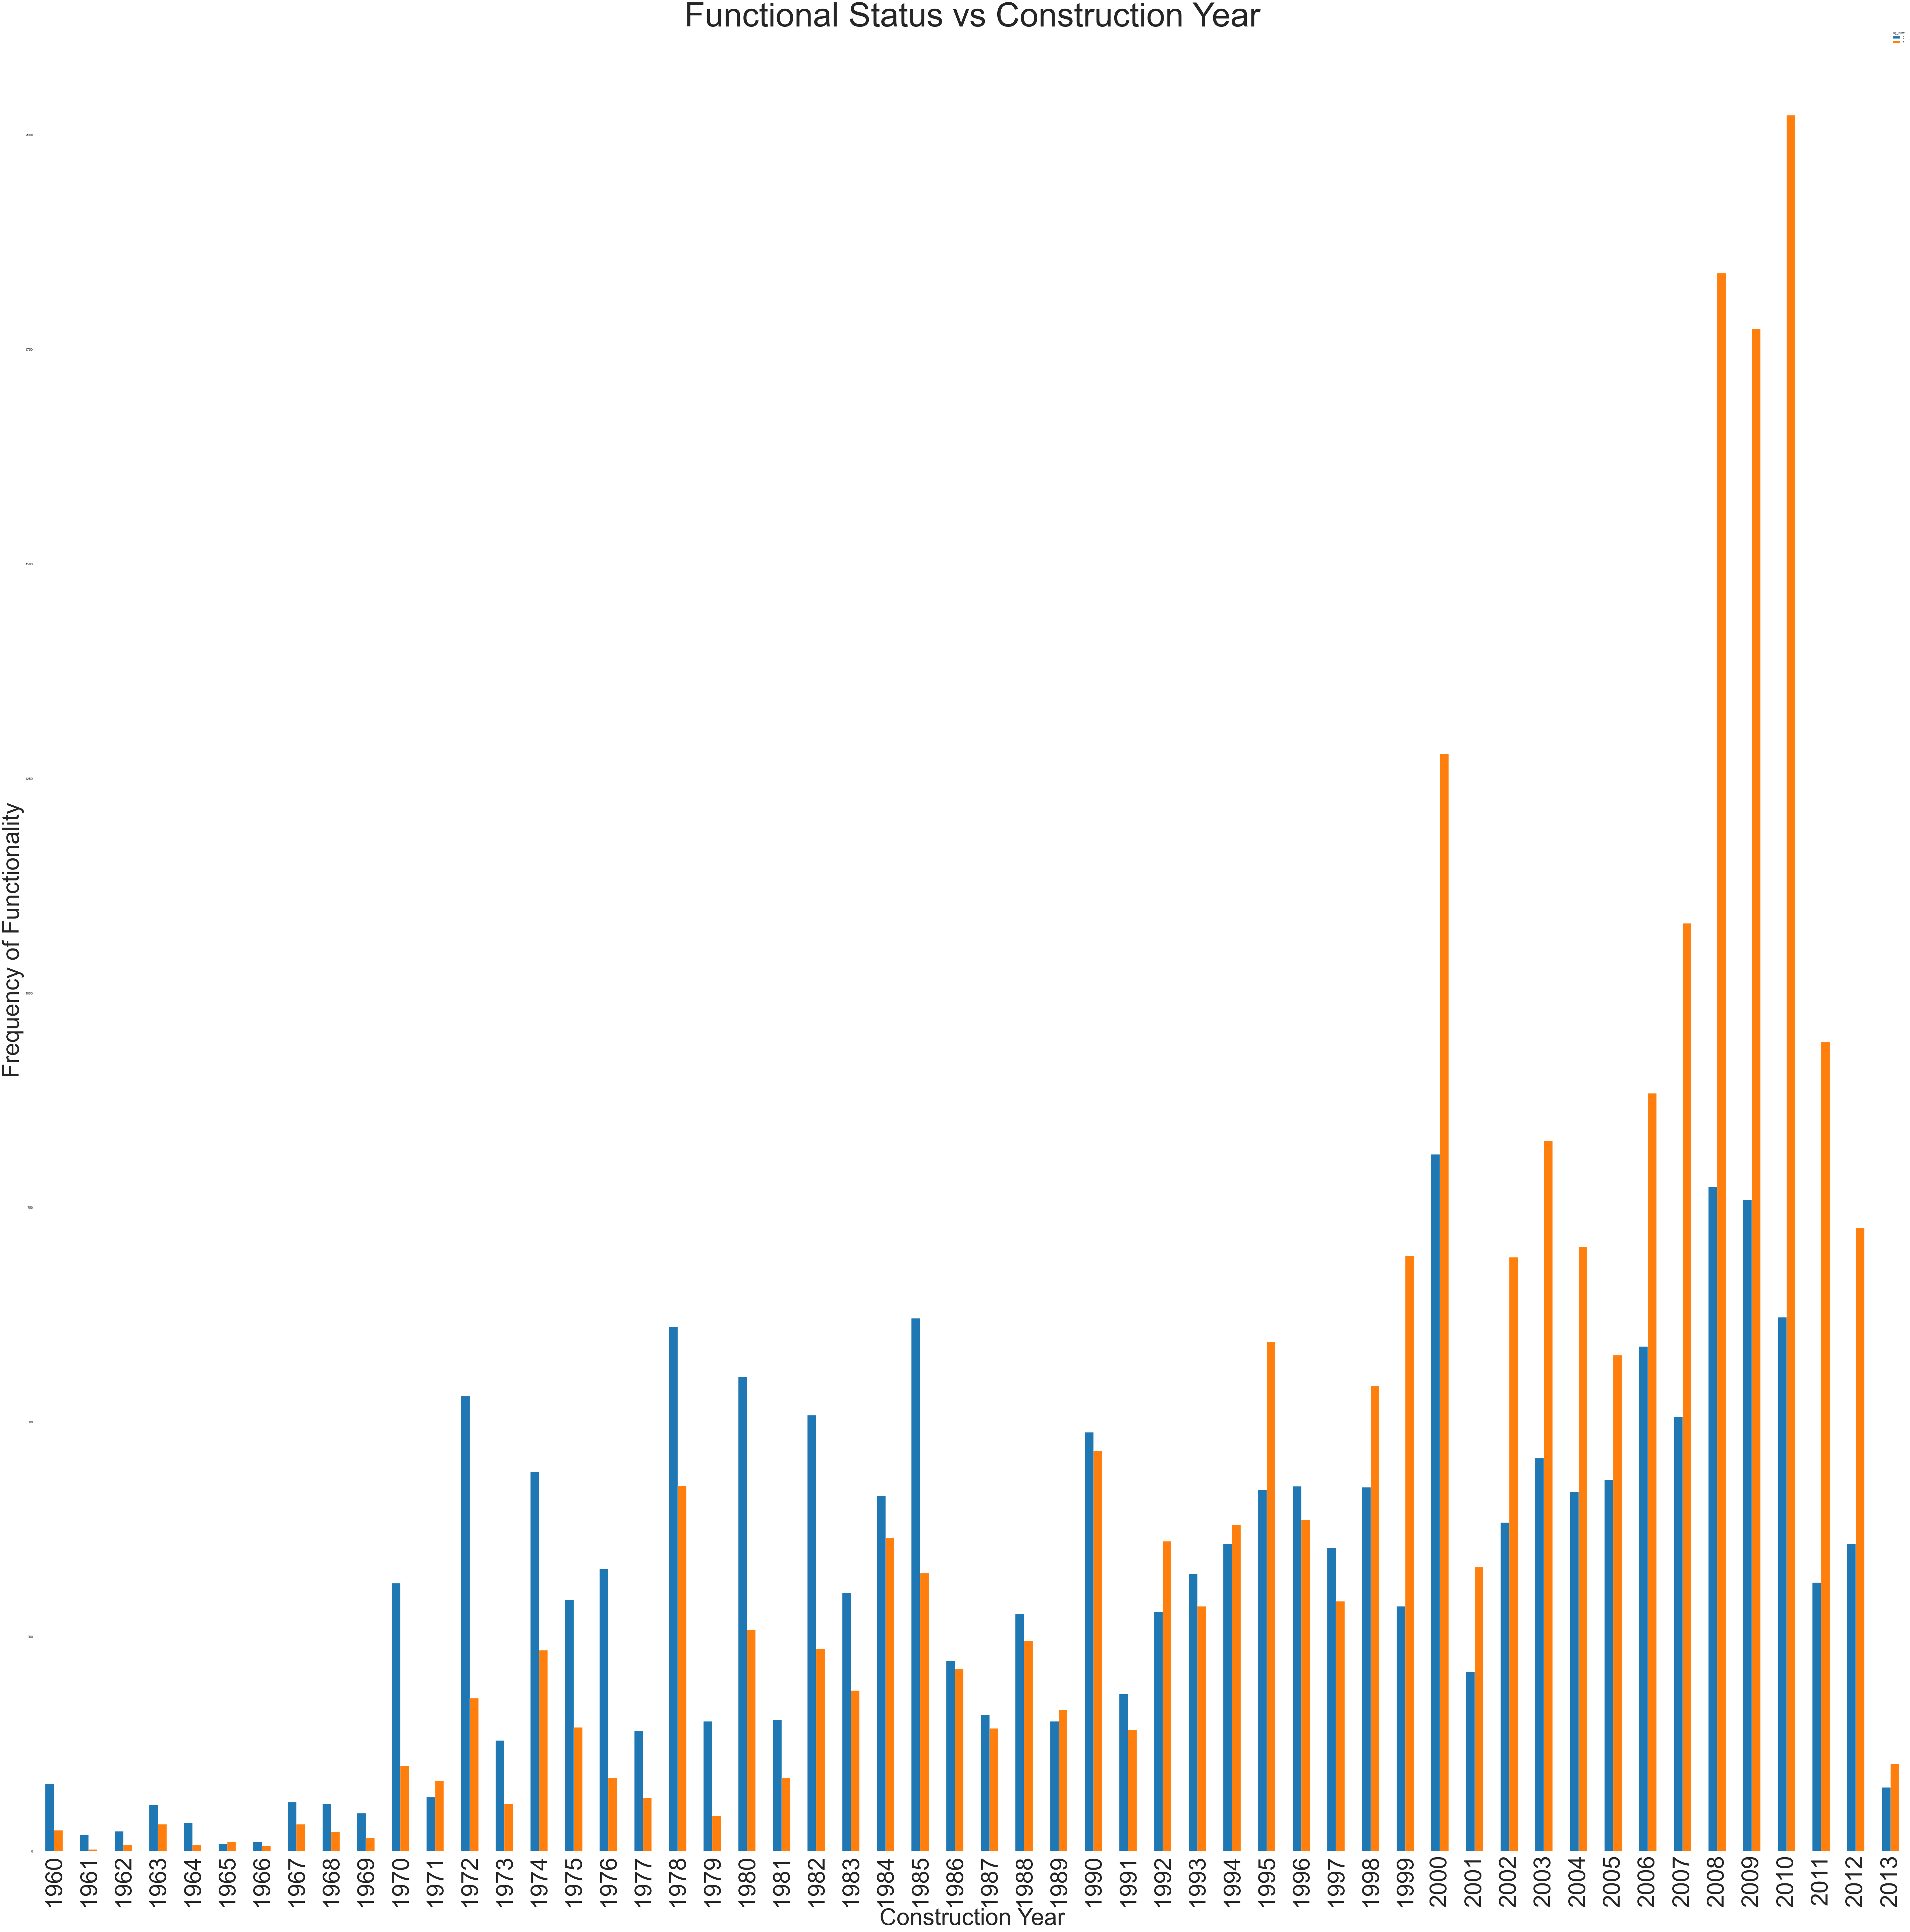

In [28]:
#Status vs construction year
%matplotlib inline
pd.crosstab(df_new.construction_year,df_new.sg_new).plot(kind='bar', figsize= (100,100))
plt.title('Functional Status vs Construction Year', fontsize = 100)
plt.xlabel('Construction Year', fontsize = 70)
plt.ylabel('Frequency of Functionality', fontsize = 70)
plt.xticks(rotation = 90, fontsize = 70);

In [29]:
def decades(year):
    #Returns unknown if value not recorded
    if year == 0:
        return 'Unknown'
    else:
        return str((year // 10) * 10)
#Apply mapping to column
df_new['construction_decades'] = df_new['construction_year'].apply(decades)

In [30]:
df_new.drop(['construction_year'], axis =1, inplace = True)

In [31]:
df_new.head()

,source_type,water_quality,waterpoint_type,sg_new,construction_decades
0,spring,soft,communal standpipe,1,1990
1,rainwater harvesting,soft,communal standpipe,1,2010
2,dam,soft,communal standpipe multiple,1,2000
3,borehole,soft,communal standpipe multiple,0,1980
5,other,salty,communal standpipe multiple,1,2000


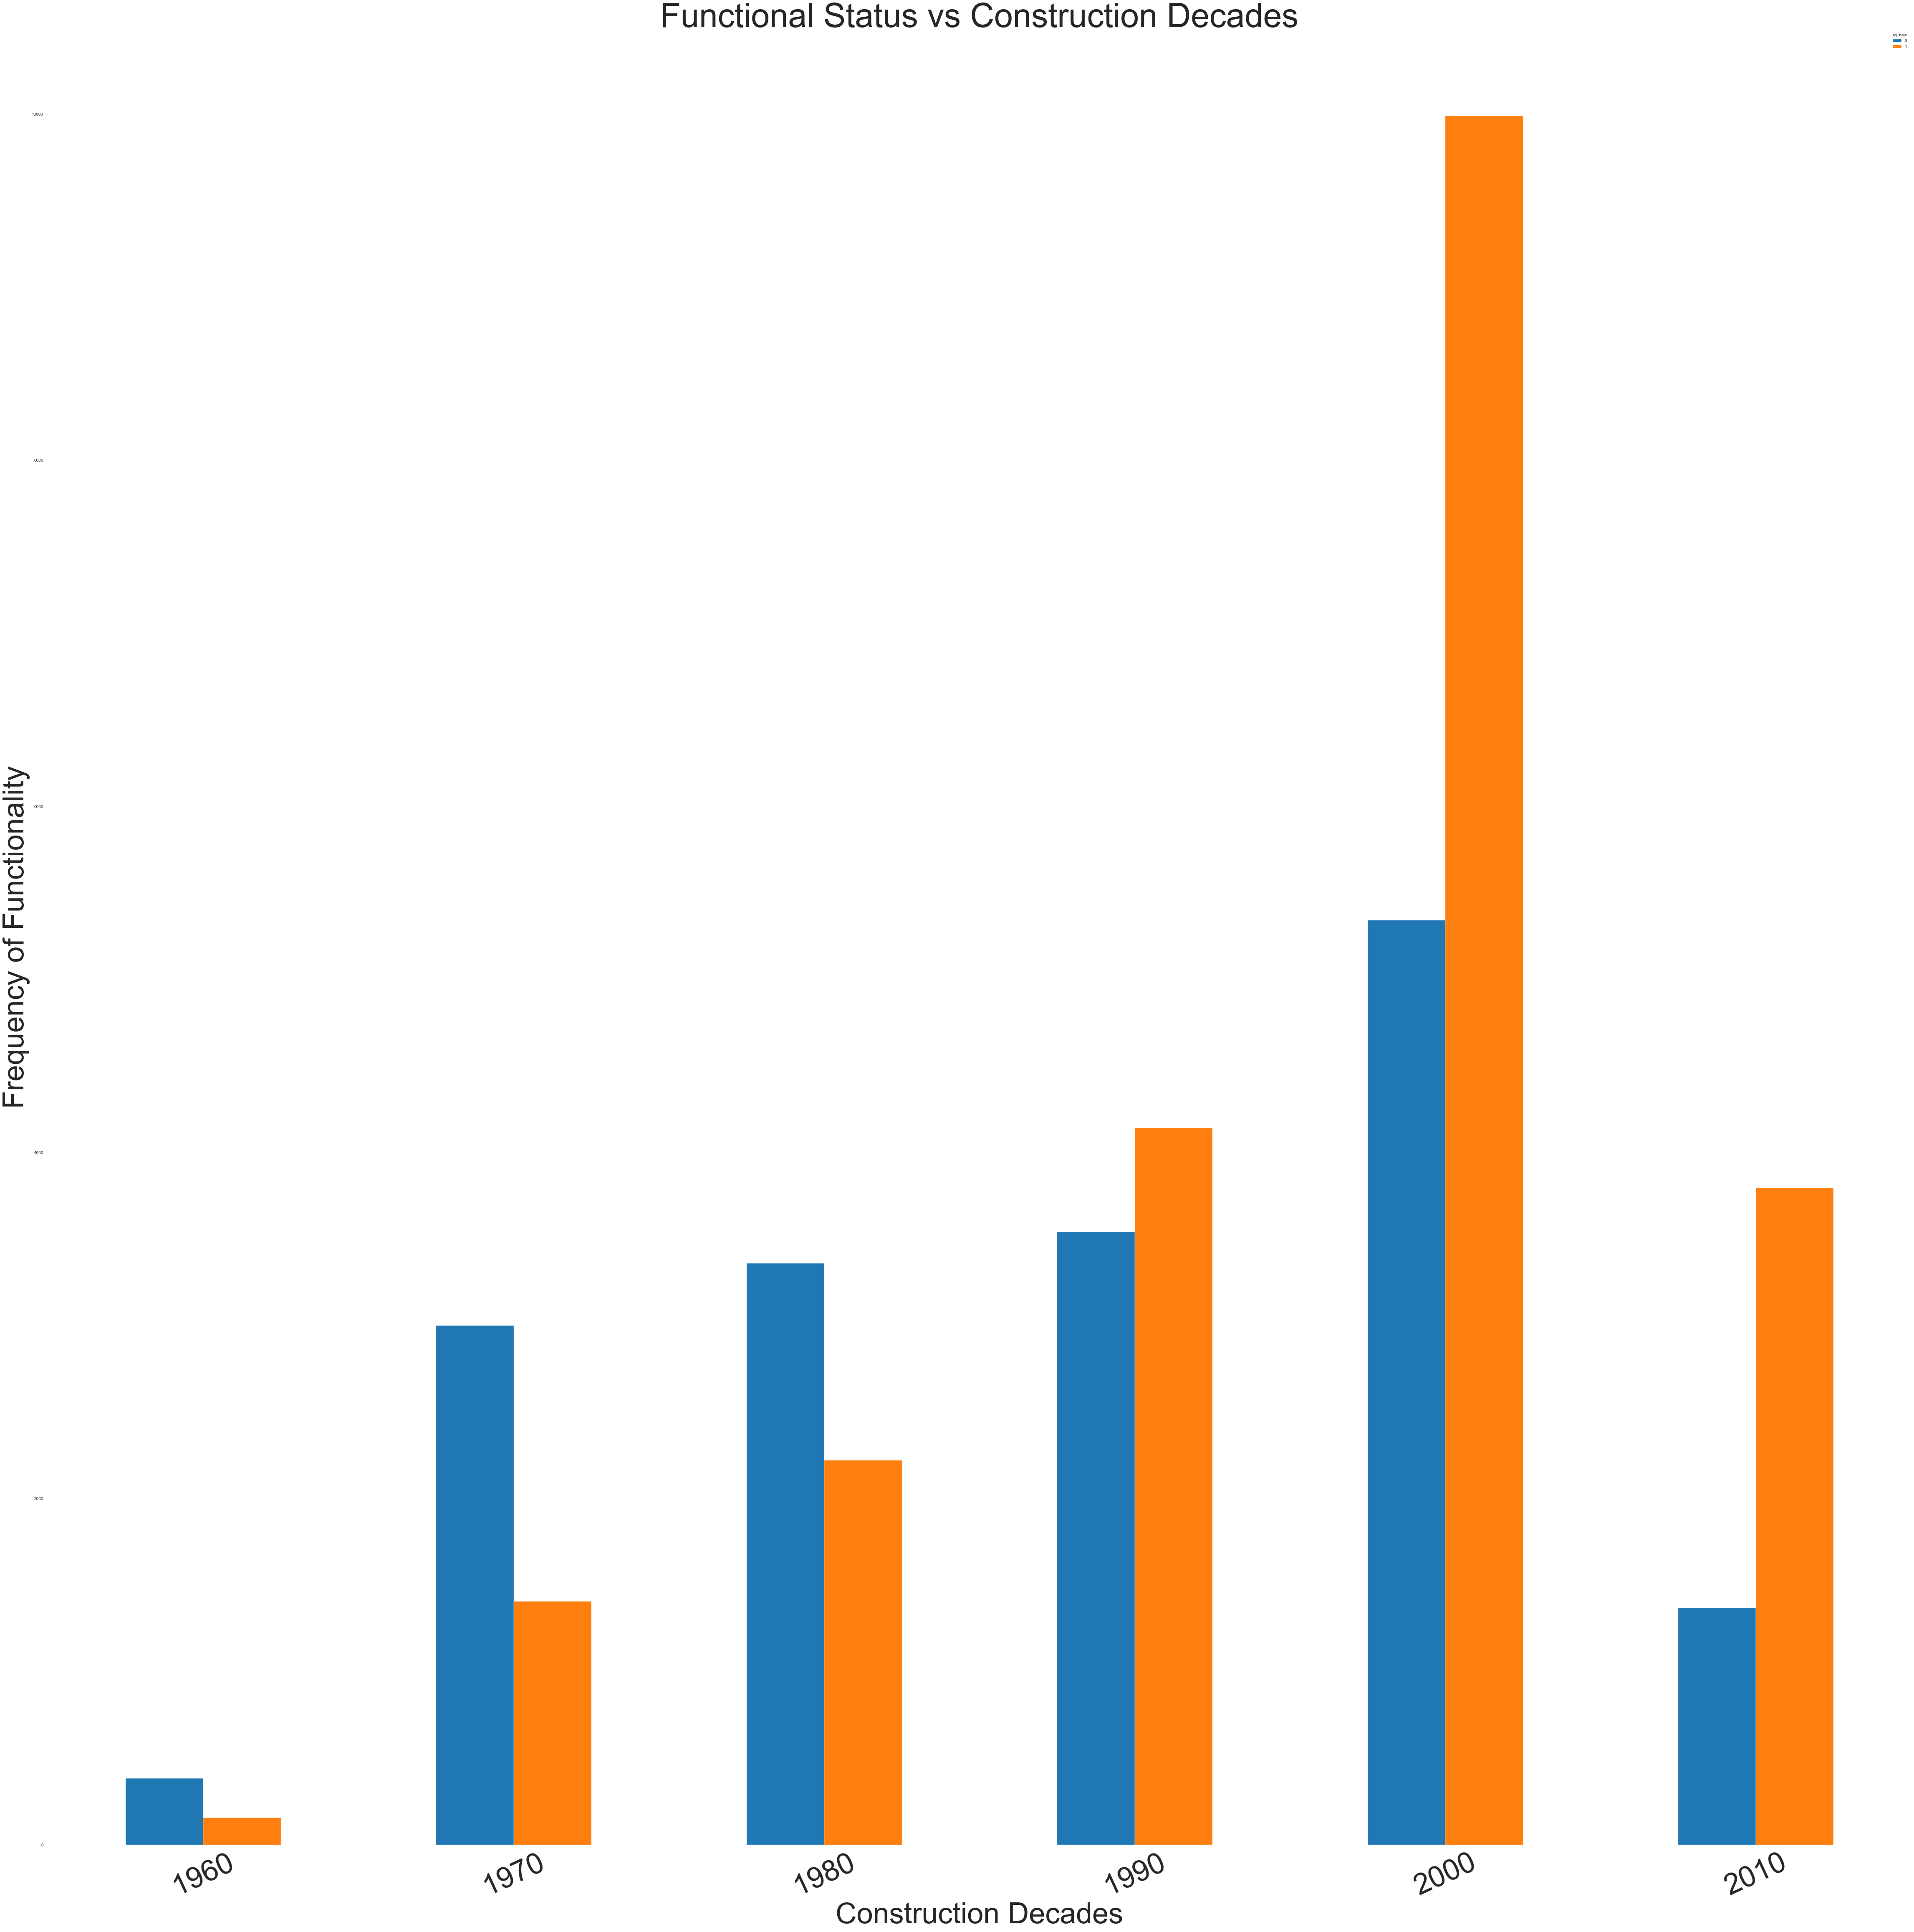

In [32]:
#Status vs construction year
%matplotlib inline
pd.crosstab(df_new.construction_decades,df_new.sg_new).plot(kind='bar', figsize= (80,80))
plt.title('Functional Status vs Construction Decades', fontsize = 80)
plt.xlabel('Construction Decades', fontsize = 70)
plt.ylabel('Frequency of Functionality', fontsize = 70)
plt.xticks(rotation = 25, fontsize = 70)
plt.savefig('construction_decades',bbox_inches='tight');

In [33]:
df_new

,source_type,water_quality,waterpoint_type,sg_new,construction_decades
0,spring,soft,communal standpipe,1,1990
1,rainwater harvesting,soft,communal standpipe,1,2010
2,dam,soft,communal standpipe multiple,1,2000
3,borehole,soft,communal standpipe multiple,0,1980
5,other,salty,communal standpipe multiple,1,2000
...,...,...,...,...,...
59391,river/lake,soft,communal standpipe,0,1960
59394,borehole,soft,communal standpipe,0,2000
59395,spring,soft,communal standpipe,1,1990
59396,river/lake,soft,communal standpipe,1,1990


In [34]:
#Modeling

In [35]:
#partion features and target 
X = df_new.drop('sg_new', axis=1)
y = df_new['sg_new']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
#create dummy variables

In [37]:
X_train_new = pd.get_dummies(X_train)

In [38]:
X_test_new = pd.get_dummies(X_test)

In [39]:
X_test_new

,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,construction_decades_1960,construction_decades_1970,construction_decades_1980,construction_decades_1990,construction_decades_2000,construction_decades_2010
27546,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
18163,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
42326,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
57387,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2565,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1164,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
14955,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
58610,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df_new['sg_new'].value_counts(normalize = True)

1   0.56
0   0.44
Name: sg_new, dtype: float64

In [41]:
# 1st Model - Dummy Model
# This is a complete "dummy" model, meaning that it will always choose the majority class. 

# Instantiate and fit the model on our data
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train_new, y_train)

DummyClassifier(strategy='most_frequent')

In [42]:
y_dummy_pred = dummy_model.predict(X_test_new)

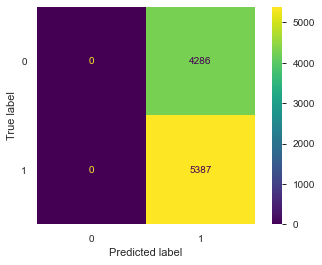

In [43]:
#confusion matrix
cm = confusion_matrix(y_test, y_dummy_pred)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [44]:
print(classification_report(y_test, y_dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4286
           1       0.56      1.00      0.72      5387

    accuracy                           0.56      9673
   macro avg       0.28      0.50      0.36      9673
weighted avg       0.31      0.56      0.40      9673



/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#our model is roughly 56% accurate 

In [46]:
#logreg 1

In [47]:
# build classifier
logreg_1 = LogisticRegression(random_state=42)
logreg_1.fit(X_train_new, y_train)

/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
y_pred = logreg_1.predict(X_test_new)

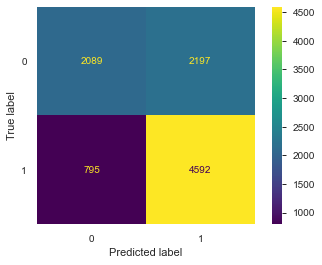

In [49]:
#Plts confusion matric for test data
cm = confusion_matrix(y_test, y_pred)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673



In [51]:
#logreg 2

In [52]:
# build classifier
logreg_2 = LogisticRegression(class_weight = 'balanced', random_state=42)
logreg_2.fit(X_train_new, y_train)

/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [53]:
y_pred_2 = logreg_2.predict(X_test_new)

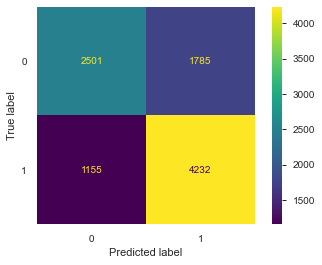

In [54]:
#Plts confusion matric for test data
cm = confusion_matrix(y_test, y_pred_2)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [55]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      4286
           1       0.70      0.79      0.74      5387

    accuracy                           0.70      9673
   macro avg       0.69      0.68      0.69      9673
weighted avg       0.69      0.70      0.69      9673



In [56]:
#logreg 3

In [57]:
logreg_3 = LogisticRegression(solver = "newton-cg", C = 0.5, random_state=42)
logreg_3.fit(X_train_new, y_train)

LogisticRegression(C=0.5, random_state=42, solver='newton-cg')

In [58]:
y_pred_3 = logreg_3.predict(X_test_new)

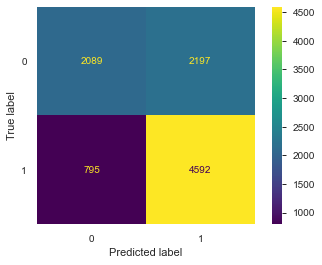

In [59]:
#Plts confusion matric for test data
cm = confusion_matrix(y_test, y_pred_3)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [60]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58      4286
           1       0.68      0.85      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.67      0.67      9673
weighted avg       0.70      0.69      0.68      9673



In [61]:
#logreg 4

In [62]:
df_new.drop(['source_type'], axis =1, inplace = True)

In [63]:
X = df_new.drop('sg_new', axis=1)
y = df_new['sg_new']

In [64]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
X_train_new = pd.get_dummies(X_train)

In [66]:
X_test_new = pd.get_dummies(X_test)

In [67]:
# build classifier
logreg_4 = LogisticRegression(random_state=42)
logreg_4.fit(X_train_new, y_train)

/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [68]:
y_pred_4 = logreg_4.predict(X_test_new)

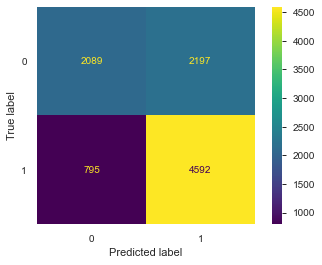

In [69]:
#Plts confusion matric for test data
cm = confusion_matrix(y_test, y_pred_3)
cmdis = ConfusionMatrixDisplay(cm)
cmdis.plot();

In [70]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.71      0.53      0.60      4286
           1       0.69      0.83      0.75      5387

    accuracy                           0.69      9673
   macro avg       0.70      0.68      0.68      9673
weighted avg       0.70      0.69      0.68      9673



In [71]:
X_train_new

,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,construction_decades_1960,construction_decades_1970,construction_decades_1980,construction_decades_1990,construction_decades_2000,construction_decades_2010
38274,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
20069,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33983,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
24515,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28178,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17323,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
58589,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1330,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [72]:
logreg_4.coef_

array([[ 6.88533854e-01,  1.15110312e+00, -8.30671433e-01,
         2.60886536e-01,  1.34854105e-01, -2.94222817e-01,
         5.18374633e-01, -1.72981664e+00,  7.73859588e-01,
         3.64793925e-01, -8.22989724e-01,  9.51221413e-01,
        -2.07795175e-03,  9.47698464e-01, -2.31346436e+00,
        -7.72541265e-01, -7.17711076e-01, -3.33005766e-01,
         1.44694954e-01,  5.00128141e-01,  1.07747637e+00]])

In [73]:
np.exp(-0.83067)

0.4357572311491082